# This notebook will go through integrating/concatenating datasets and basic annotations including cell typing.

<a href="https://colab.research.google.com/github/Ken-Lau-Lab/single-cell-lectures/blob/main/notebooks2025/Lecture5_Annotation_Integration.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation of Packages

In [1]:
!pip install matplotlib==3.7.5
#==3.6.2

In [2]:
!pip install scanpy==1.10.1
!pip install pandas==2.2.2
!pip install numpy==1.26.4

In [3]:
!pip install setuptools==65.5.0 wheel==0.38.4

In [4]:
!pip install POT

  Using cached POT-0.9.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (34 kB)
Using cached POT-0.9.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (897 kB)


In [5]:
!pip install anndata

In [6]:
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.8 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/Ken-Lau-Lab/single-cell-lectures  # for Colab users

## Import packages

In [7]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import anndata as ad

/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/usr

In [9]:
! mkdir ALVHW5_2

In [10]:
! curl -O -J -L https://www.dropbox.com/scl/fi/7oh25h3oel67yiuhyc308/L5_Dataset2_v2.h5ad?rlkey=mmn4ivhhe8qe41c56hu7nvbkn&st=7j7zqej8&dl=0

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    17  100    17    0     0     19      0 --:--:-- --:--:-- --:--:--    19
100   491    0   491    0     0    339      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
curl: (23) Failed writing header


In [15]:
dat_2 = sc.read_h5ad('L5_Dataset2_v2.h5ad')

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [14]:
! curl -O -J -L https://www.dropbox.com/scl/fi/2hyr2p28qhicqtkxr2ma9/L5_Dataset1_v2.h5ad?rlkey=gx6r5hqv46zfbop3m496eftjn&st=ue9m95lh&dl=0

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    17  100    17    0     0     15      0  0:00:01  0:00:01 --:--:--    15
100   491    0   491    0     0    314      0 --:--:--  0:00:01 --:--:--  2172
100 14.8M  100 14.8M    0     0  6325k      0  0:00:02  0:00:02 --:--:-- 19.2M


In [16]:
dat_1 = sc.read_h5ad('L5_Dataset1_v2.h5ad')

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [17]:
dat_1

AnnData object with n_obs × n_vars = 2335 × 29577
    var: 'ENSG_ID'

In [18]:
dat_2

AnnData object with n_obs × n_vars = 2200 × 29577
    var: 'ENSG_ID'

In [20]:
dat_1.var_names_make_unique()

In [21]:
dat_2.var_names_make_unique()

In [66]:
dat_1_2_new = ad.concat([dat_1, dat_2], join='inner', label='Dataset_pick', keys= ['dat_1', 'dat_2'])

# dat_combo_inner = ad.concat([dat1, dat2], join = 'inner', label = 'Dataset_ID', keys = ['PBMC', 'Tumor'])


In [67]:
dat_1_2_new

AnnData object with n_obs × n_vars = 4535 × 29577
    obs: 'Dataset_pick'

In [68]:
def normalization( dat_1_2_new):
    """this function normalize the data so that each cell has the same
    number of total counts as the median value of the total counts among all cells.
    The data will also be log-like transformed
    Count values will also be transformed to z-scores for each gene"""
    sc.pp.normalize_total(dat_1_2_new)
    dat_1_2_new.X = np.arcsinh(dat_1_2_new.X).copy()
    dat_1_2_new.layers['arcsinh'] = dat_1_2_new.X.copy()
    sc.pp.scale(dat_1_2_new)

    return dat_1_2_new

In [69]:
dat_1_2_new.raw = dat_1_2_new.copy()

# Reading in and initial data processing

In [70]:
dat_1_2_new

AnnData object with n_obs × n_vars = 4535 × 29577
    obs: 'Dataset_pick'

In [71]:
normalization(dat_1_2_new)

AnnData object with n_obs × n_vars = 4535 × 29577
    obs: 'Dataset_pick'
    var: 'mean', 'std'
    layers: 'arcsinh'

In [72]:
n_neighbors = int( np.sqrt(dat_1_2_new.n_obs) ) # an optimal number for k in KNN

In [73]:
sc.tl.pca(dat_1_2_new, return_info=False, use_highly_variable = False ) #PCA

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


In [74]:
sc.pp.neighbors( dat_1_2_new, n_neighbors= n_neighbors , n_pcs=50, ) # make neighborhood graph

In [75]:
sc.tl.umap(dat_1_2_new, random_state=0) # make UMAP

In [76]:
sc.tl.leiden( dat_1_2_new, resolution = 0.7)

In [77]:
dat_1_2_new

AnnData object with n_obs × n_vars = 4535 × 29577
    obs: 'Dataset_pick', 'leiden'
    var: 'mean', 'std'
    uns: 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh'
    obsp: 'distances', 'connectivities'

In [78]:
sc.set_figure_params(figsize=[4,4], dpi = 150)

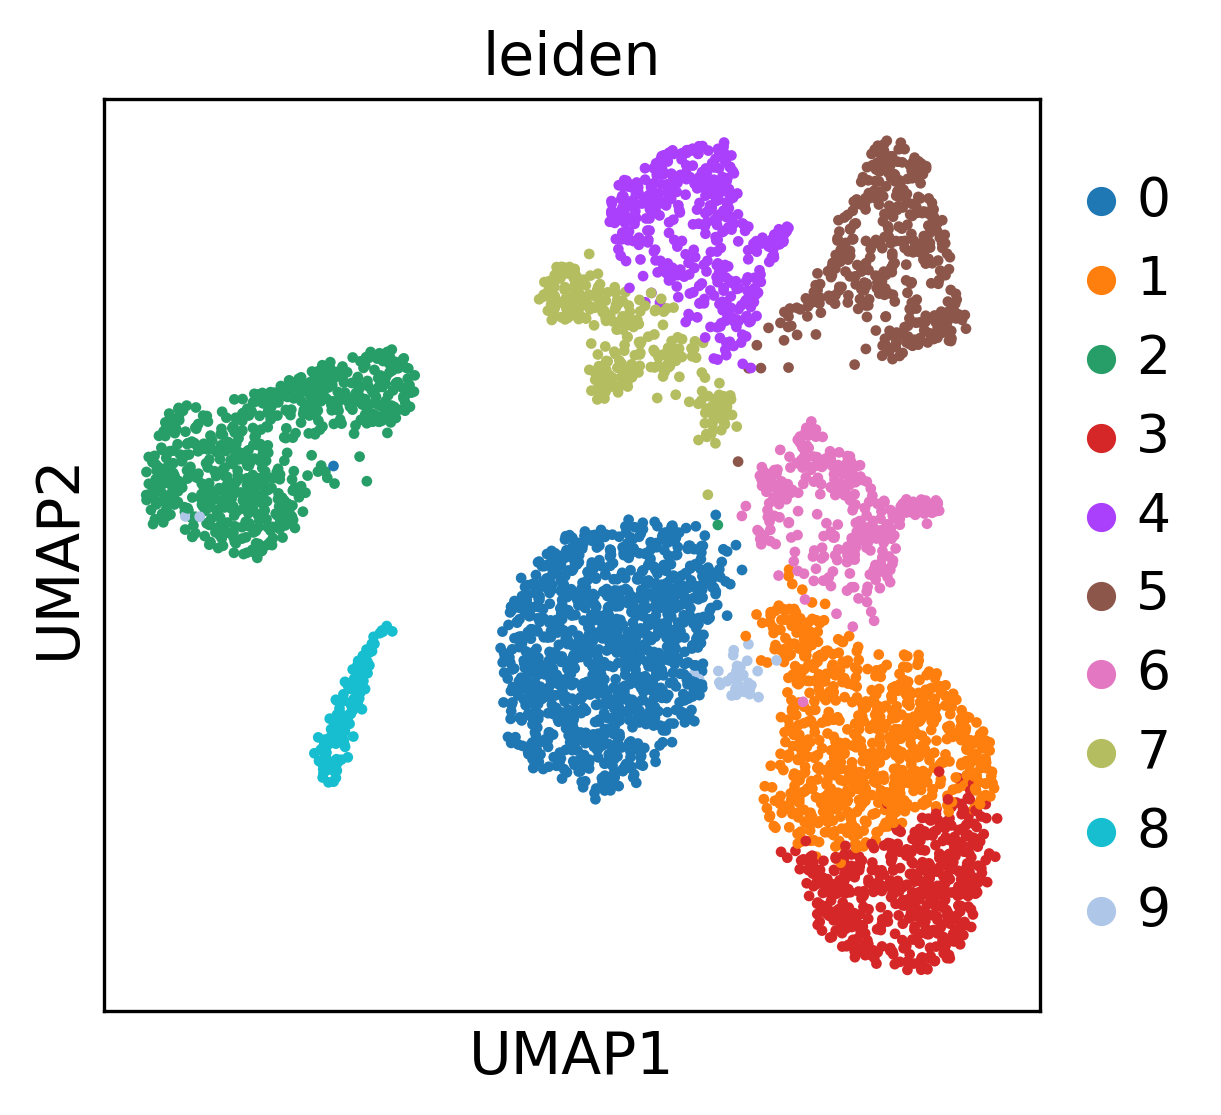

In [79]:
sc.pl.umap( dat_1_2_new, color = ['leiden'])

# Identifying different cell populations

In [80]:
# Run for differential gene expression of each leiden cluster
sc.tl.rank_genes_groups( dat_1_2_new, groupby='leiden', use_raw= False, layer='arcsinh', key_added='leiden_cluster', method= 'wilcoxon' )

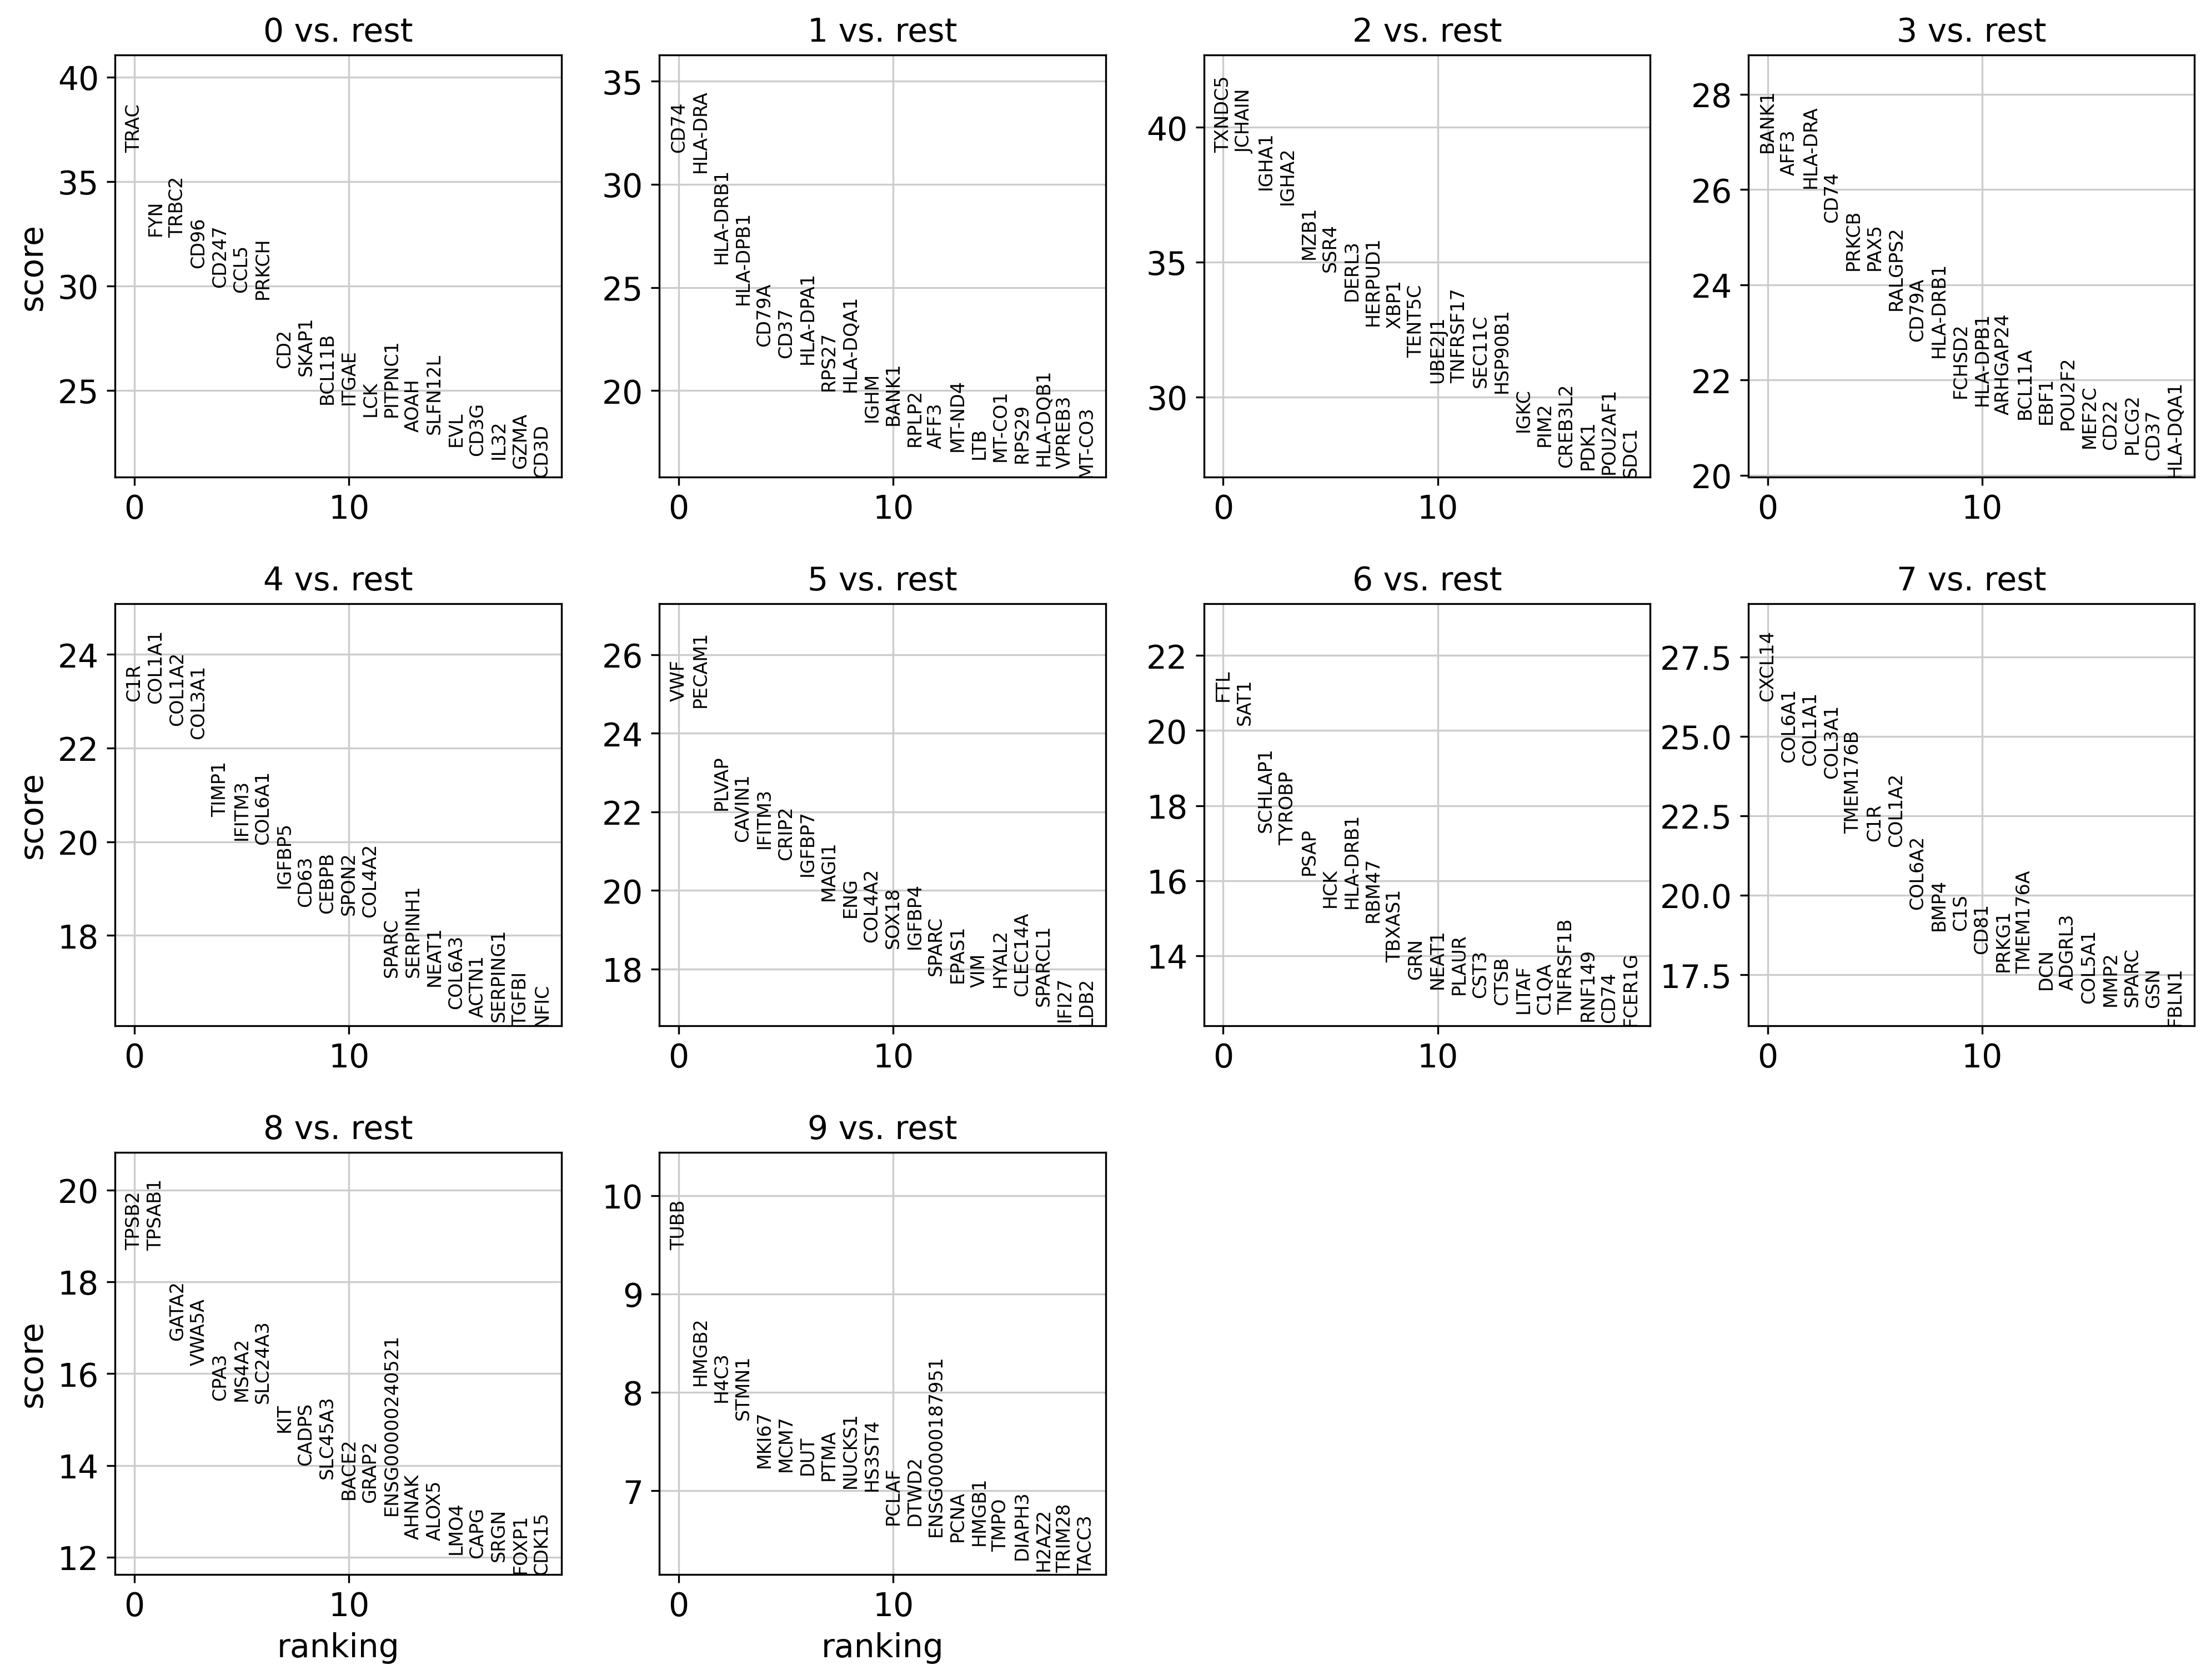

In [81]:
sc.pl.rank_genes_groups( dat_1_2_new, key='leiden_cluster', sharey= False )

In [82]:
markers = ['CD79A', 'CD8A', 'COL1A1', 'S100A8', 'PECAM1', 'KIT', 'IRF4']

#Attach a matrix plot that includes the genes CD79A, CD8A, COL1A1, S100A8, PECAM1, KIT, and IRF4

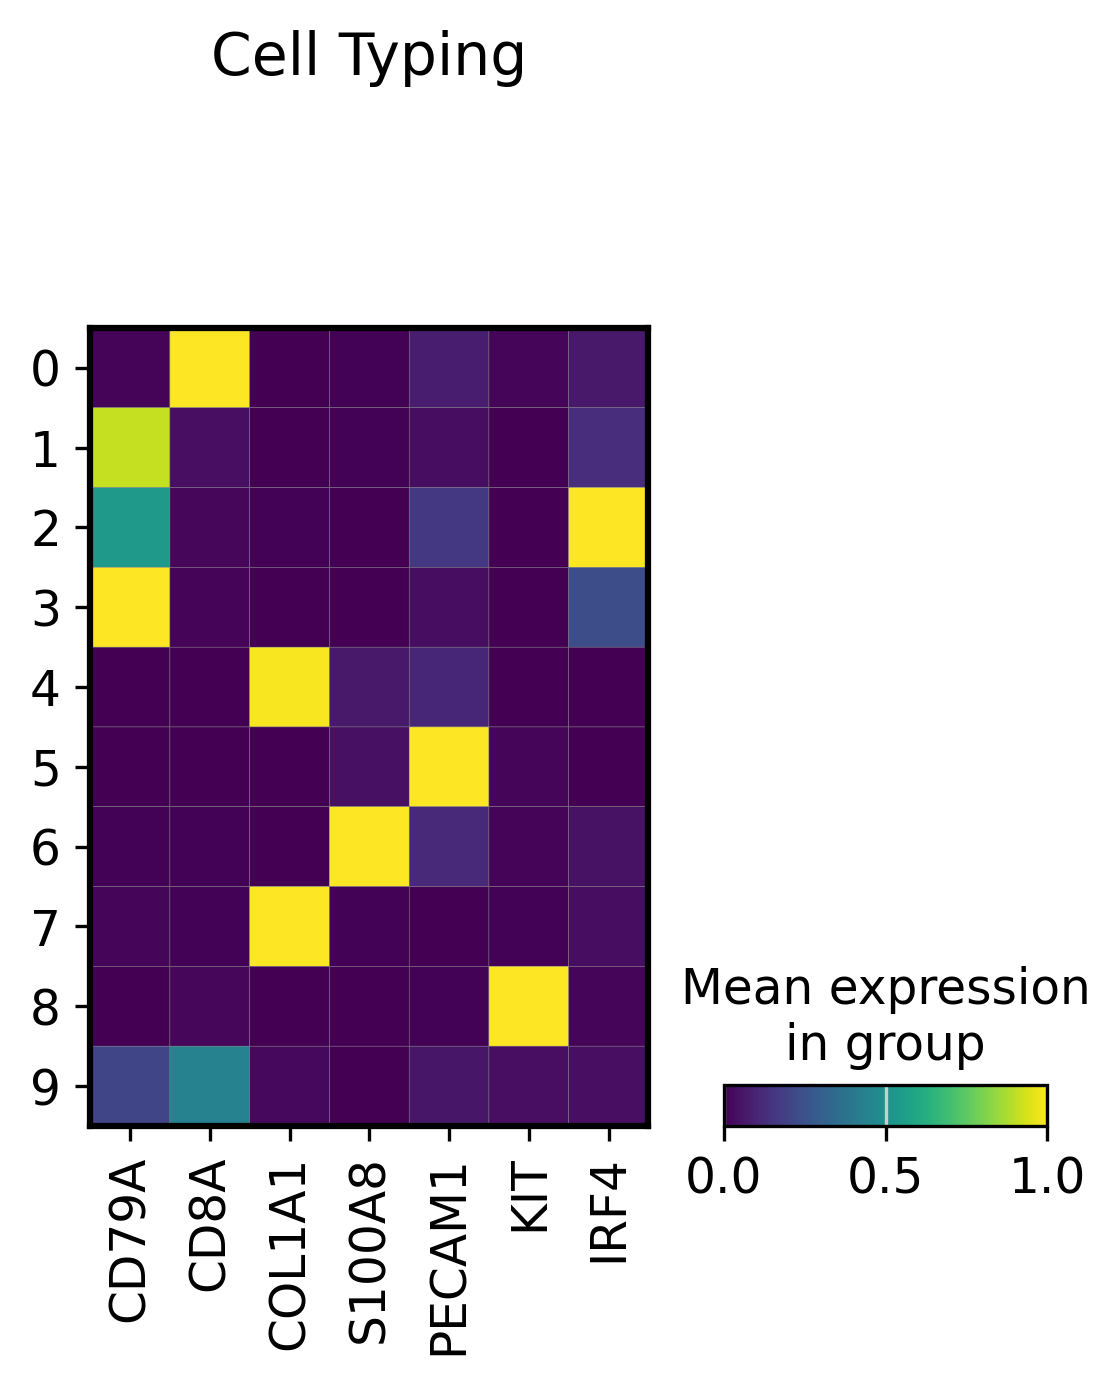

In [83]:
sc.pl.matrixplot(dat_1_2_new, var_names = markers, groupby = 'leiden', title = 'Cell Typing', use_raw = False, standard_scale = 'var')

In [65]:
# Add a variable to the anndata object to identify cells

example_celltypes = []
for x in (dat.obs['leiden']):
    if np.isin(x, ['0']):
        example_celltypes.append('T cells')
    elif np.isin(x, ['1']):
        example_celltypes.append('NK cells')
    elif x == '3':
        example_celltypes.append('B cells')
    elif np.isin(x, ['2', '4']):
        example_celltypes.append('Monocytes')
    elif x == '5':
        example_celltypes.append('Dendritic cells')

dat.obs['Cell_Types'] = example_celltypes

KeyError: 'CD8A'

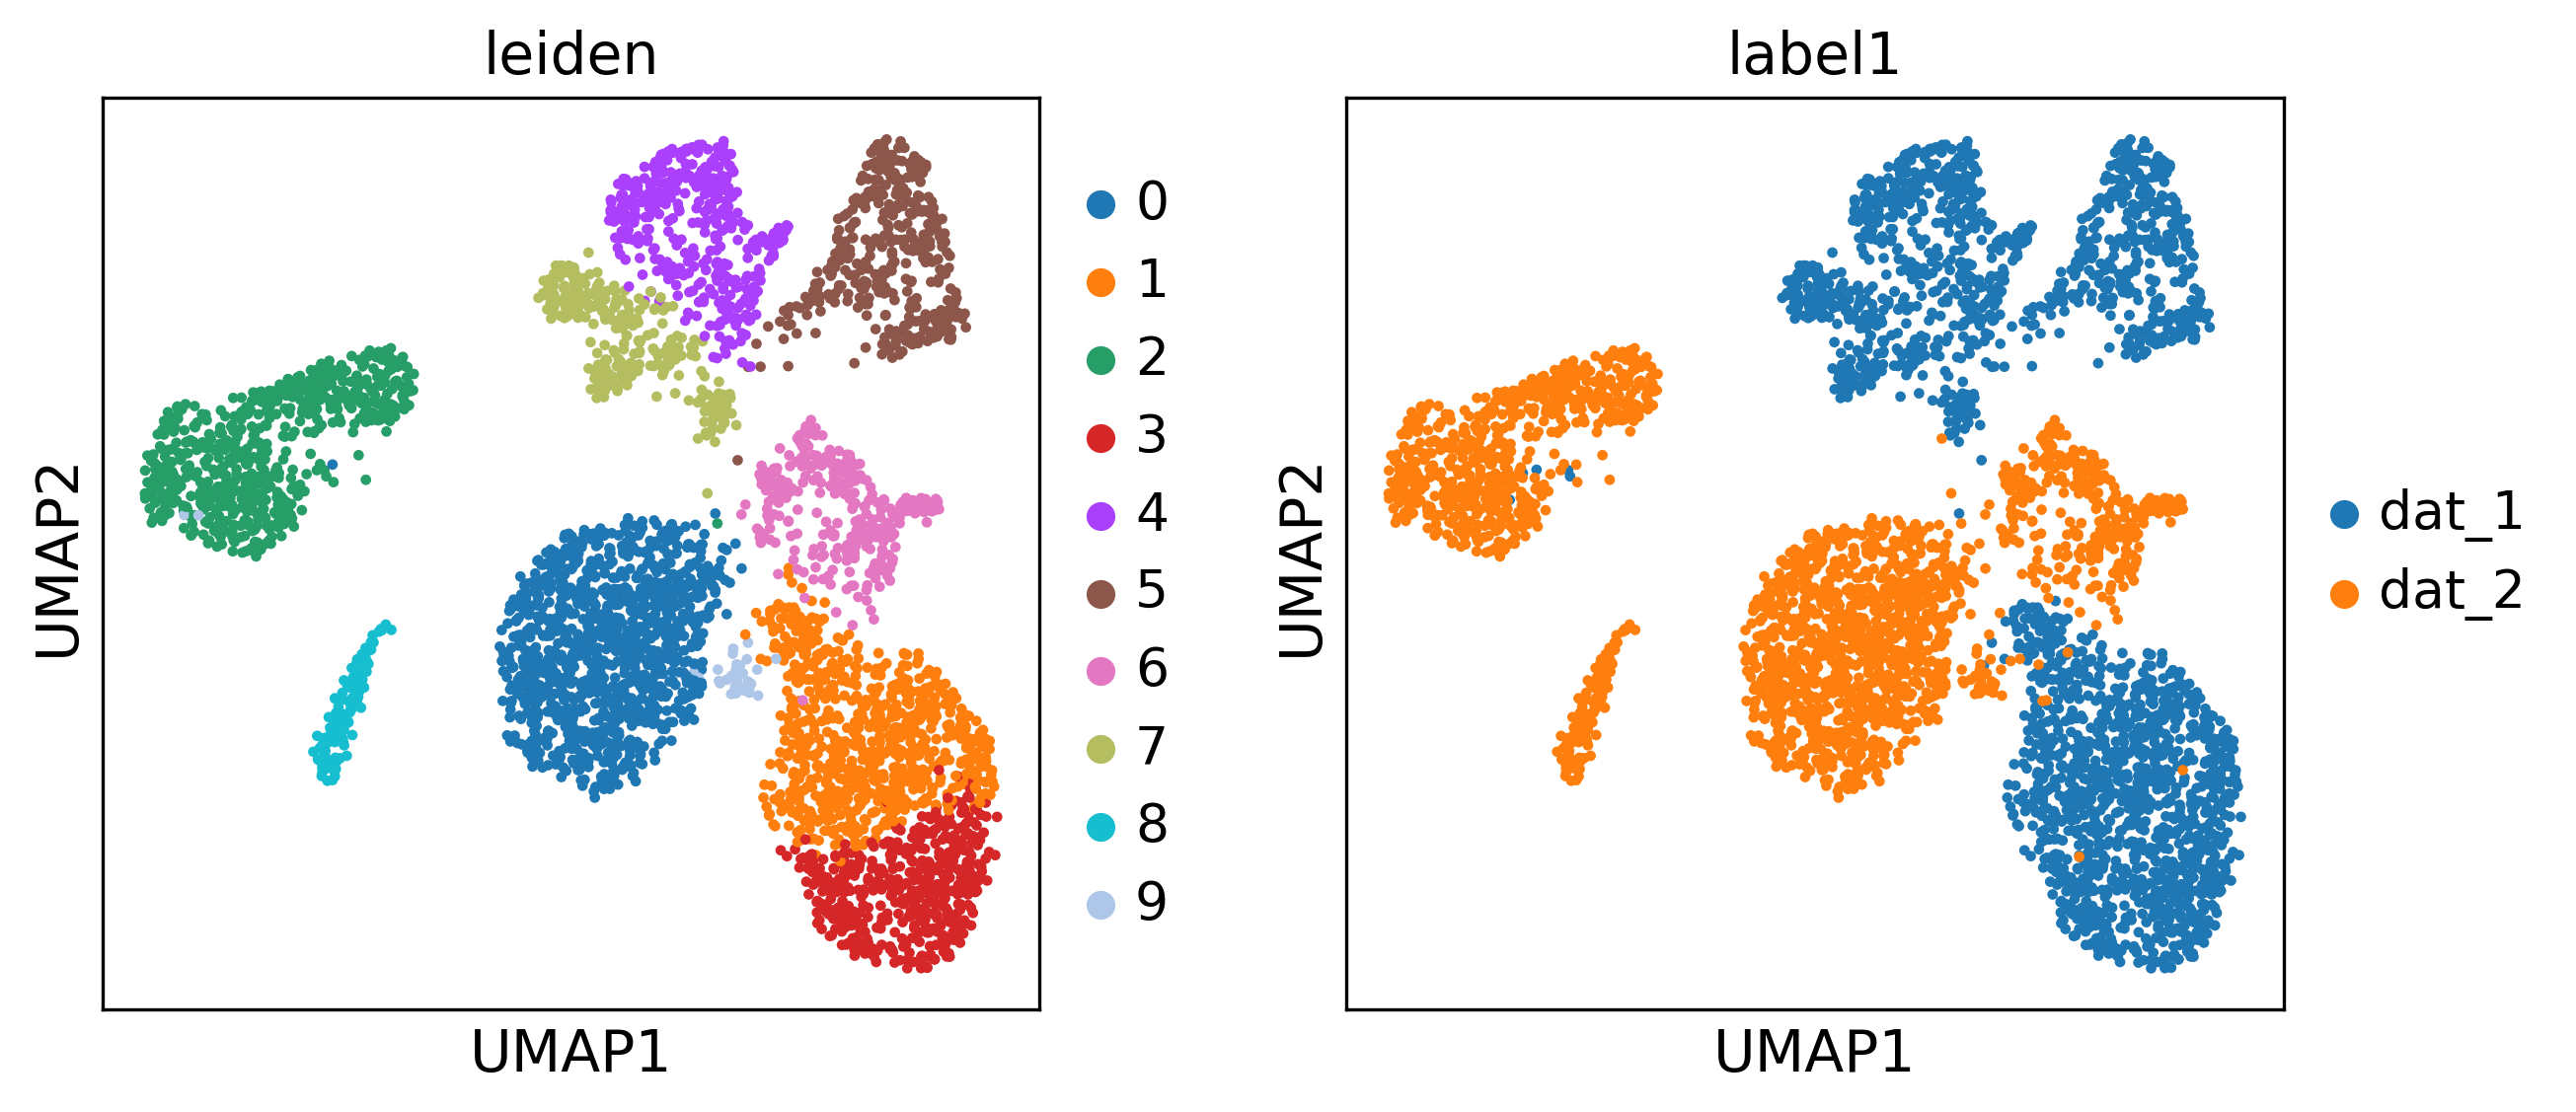

In [60]:
sc.pl.umap( dat_1_2_new, color = ['leiden', 'label1'])

In [ ]:
# Add a variable to the anndata object to identify cells

example_clusters = []
for x in (dat.obs['Cell_Types']):
    if np.isin(x, ['T cells', 'NK cells']):
        example_clusters.append('Cluster 1')
    elif x == 'B cells':
        example_clusters.append('Cluster 2')
    elif np.isin(x, ['Monocytes', 'Dendritic cells']):
        example_clusters.append('Cluster 3')

dat.obs['Clustering_Example'] = example_clusters

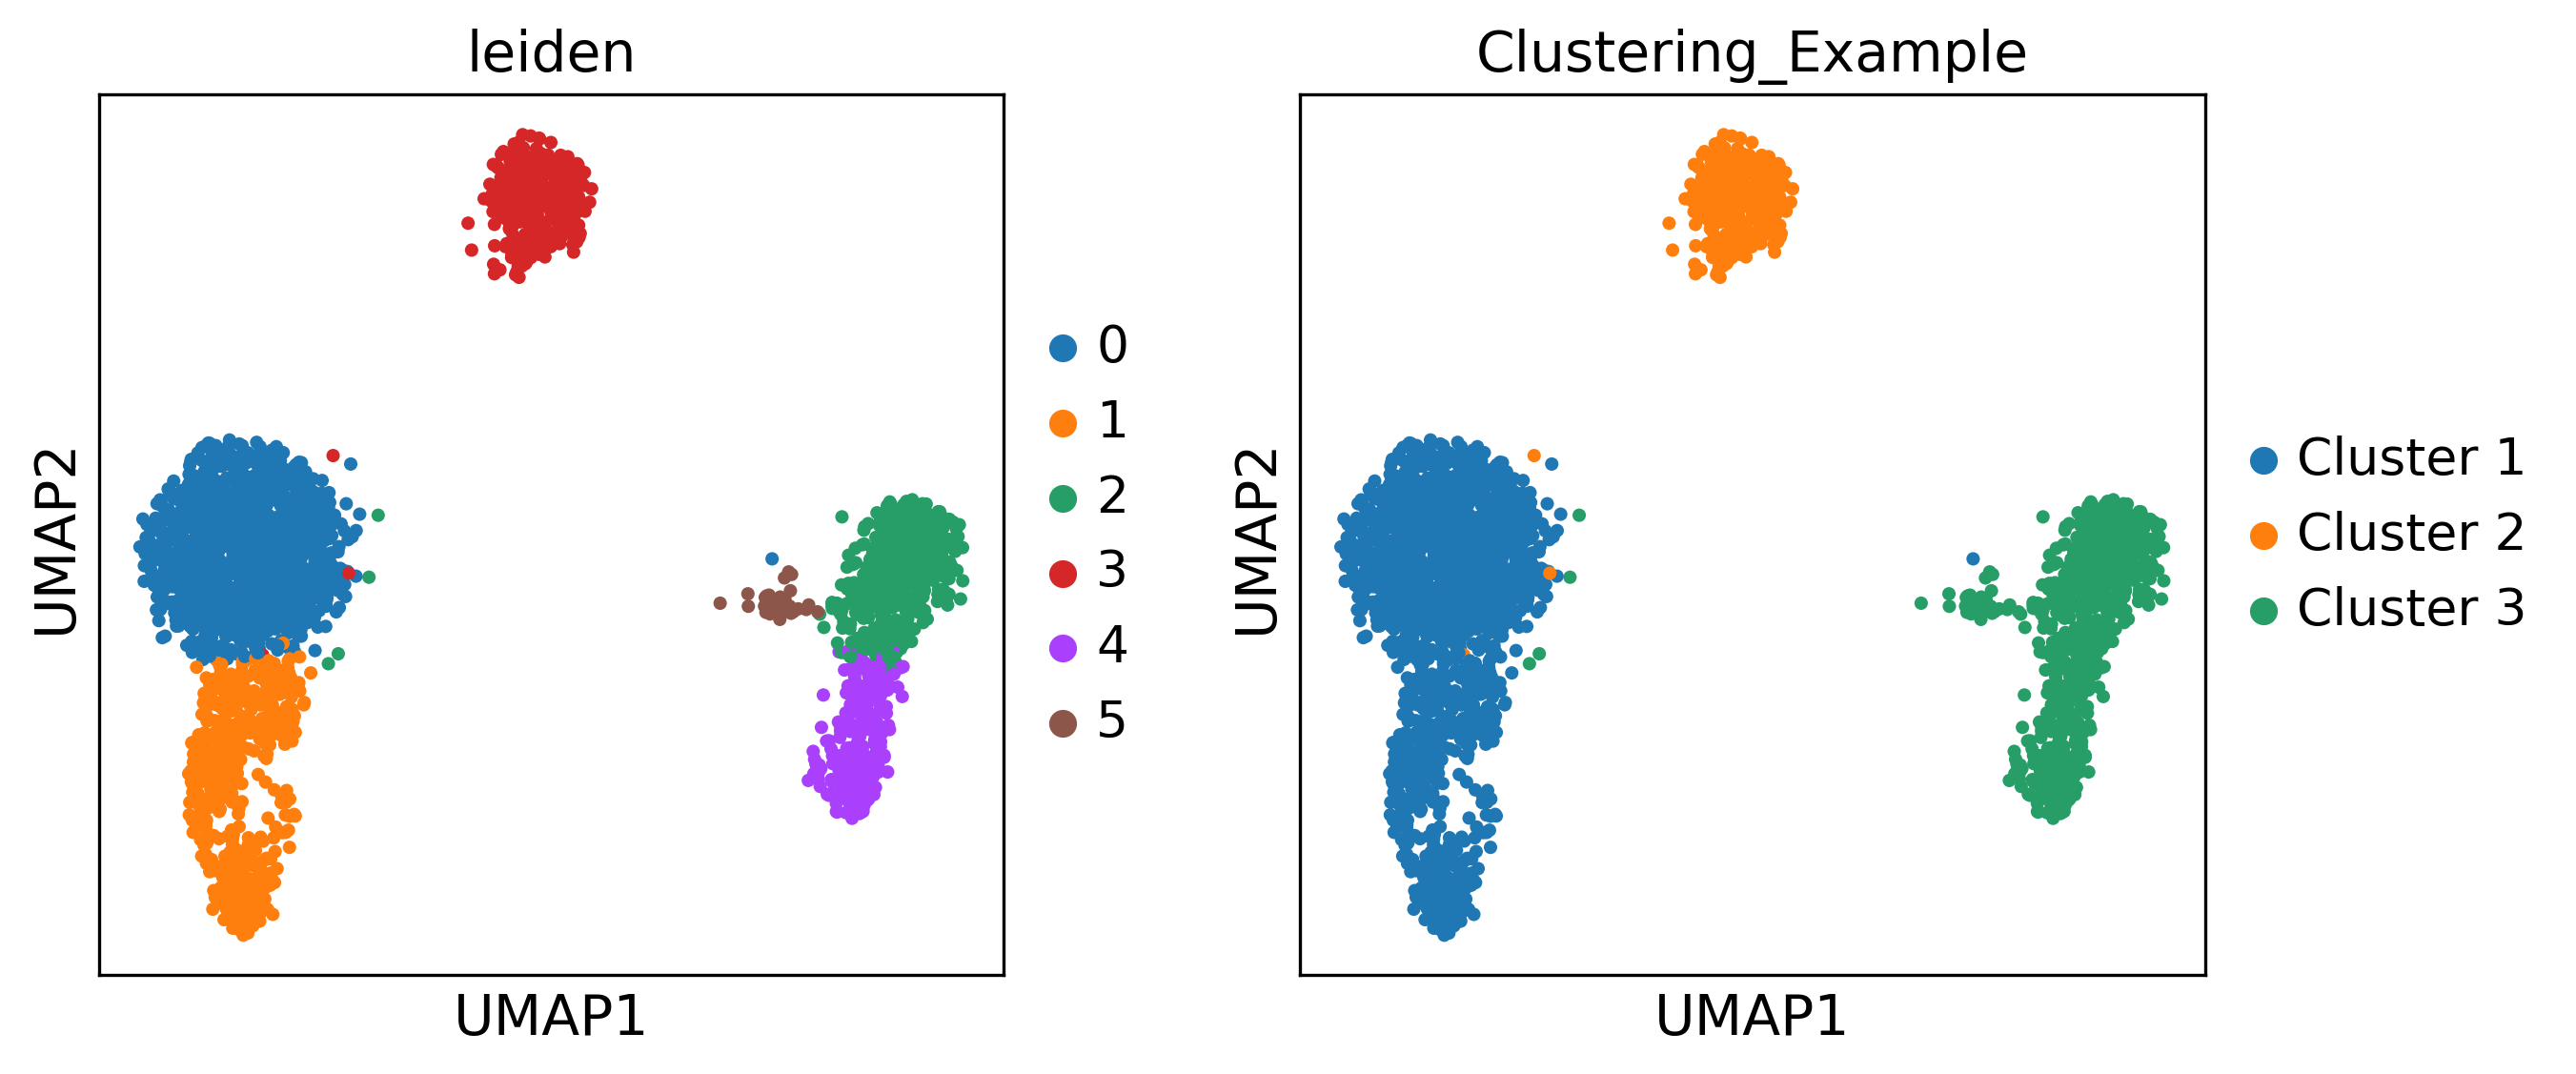

In [ ]:
sc.pl.umap( dat, color = ['leiden', 'Clustering_Example'])

# Integrating Datasets

In [ ]:
#Read in the datasets of interest
dat1 = sc.read('PBMC_3k_small.h5ad')
dat2 = sc.read('GSM3305227_Tumor_1_Full.h5ad')

In [ ]:
dat1

AnnData object with n_obs × n_vars = 2625 × 1838
    var: 'gene_ids'

In [ ]:
dat2

AnnData object with n_obs × n_vars = 1206 × 25507

In [ ]:
#combine anndata objects with inner concat
dat_combo_inner = ad.concat([dat1, dat2], join = 'inner', label = 'Dataset_ID', keys = ['PBMC', 'Tumor'])

In [ ]:
dat_combo_inner

AnnData object with n_obs × n_vars = 3831 × 38
    obs: 'Dataset_ID'

In [ ]:
dat_combo_inner.X

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#combine anndata objects with outer concat and NaN fill value
dat_combo_outer_NaN = ad.concat([dat1, dat2], join = 'outer', fill_value = 'NaN', label = 'Dataset_ID', keys = ['PBMC', 'Tumor'])

In [ ]:
dat_combo_outer_NaN

AnnData object with n_obs × n_vars = 3831 × 27307
    obs: 'Dataset_ID'

In [ ]:
dat_combo_outer_NaN.X

array([['NaN', 'NaN', 'NaN', ..., 'NaN', 'NaN', 'NaN'],
       ['NaN', 'NaN', 'NaN', ..., 'NaN', 'NaN', 'NaN'],
       ['NaN', 'NaN', 'NaN', ..., 'NaN', 'NaN', 'NaN'],
       ...,
       [0.0, 1.0, 0.0, ..., 0.0, 1.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 4.0, 0.0, ..., 0.0, 1.0, 0.0]], dtype=object)

In [ ]:
#combine anndata objects with outer concat and 0 fill value
dat_combo_outer = ad.concat([dat1, dat2], join = 'outer', fill_value = '0', label = 'Dataset_ID', keys = ['PBMC', 'Tumor'])

In [ ]:
dat_combo_outer

AnnData object with n_obs × n_vars = 3831 × 27307
    obs: 'Dataset_ID'

In [ ]:
dat_combo_outer.X

array([['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ...,
       [0.0, 1.0, 0.0, ..., 0.0, 1.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 4.0, 0.0, ..., 0.0, 1.0, 0.0]], dtype=object)